In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
raw_df = pd.read_csv('StudentsPerformance.csv')
df = raw_df.copy()
print(df.shape)

(1000, 8)


In [ ]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Инициализируем переменные

In [15]:
subjects = ['math score', 'reading score', 'writing score']
categories = ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
pass_score = 40

Получим список категорий

In [16]:
categories_df = pd.concat(
    (pd.Series(df[col].unique(), name=col) for col in categories), axis=1
)
categories_df

,race/ethnicity,parental level of education,lunch,test preparation course
0,group B,bachelor's degree,standard,none
1,group C,some college,free/reduced,completed
2,group A,master's degree,NaN,NaN
3,group D,associate's degree,NaN,NaN
4,group E,high school,NaN,NaN
5,NaN,some high school,NaN,NaN


Исследуем распределение результата по разным дисциплинам

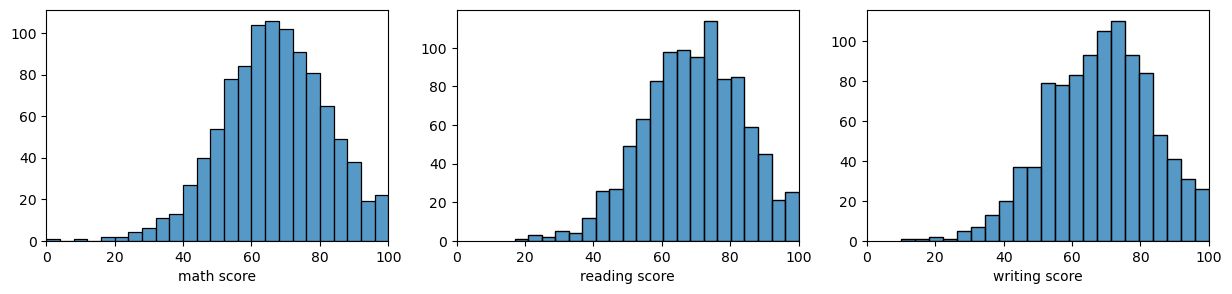

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
for i, col in enumerate(subjects):
    sns.histplot(data=df, x=col, ax=ax[i])
    ax[i].set_xlim(0, 100)
    ax[i].set_ylabel('')

Узнаем, какая доля студентов сдала экзамен

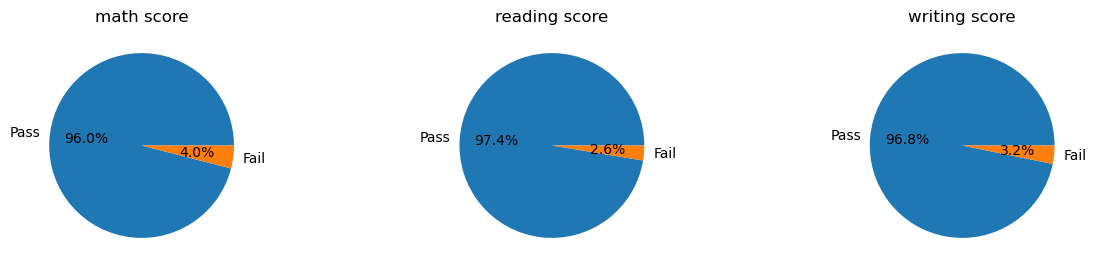

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
for i, col in enumerate(subjects):
    counts = pd.Series(np.where(df[col] >= pass_score, 'Pass', 'Fail')).value_counts()
    ax[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    ax[i].set_title(col)

Получим сумму баллов по трем дисциплинам

In [19]:
df['total score'] = df.loc[:, 'math score':'writing score'].sum(axis='columns')

Исследуем диаграммы распределения результата экзаменов по категориям

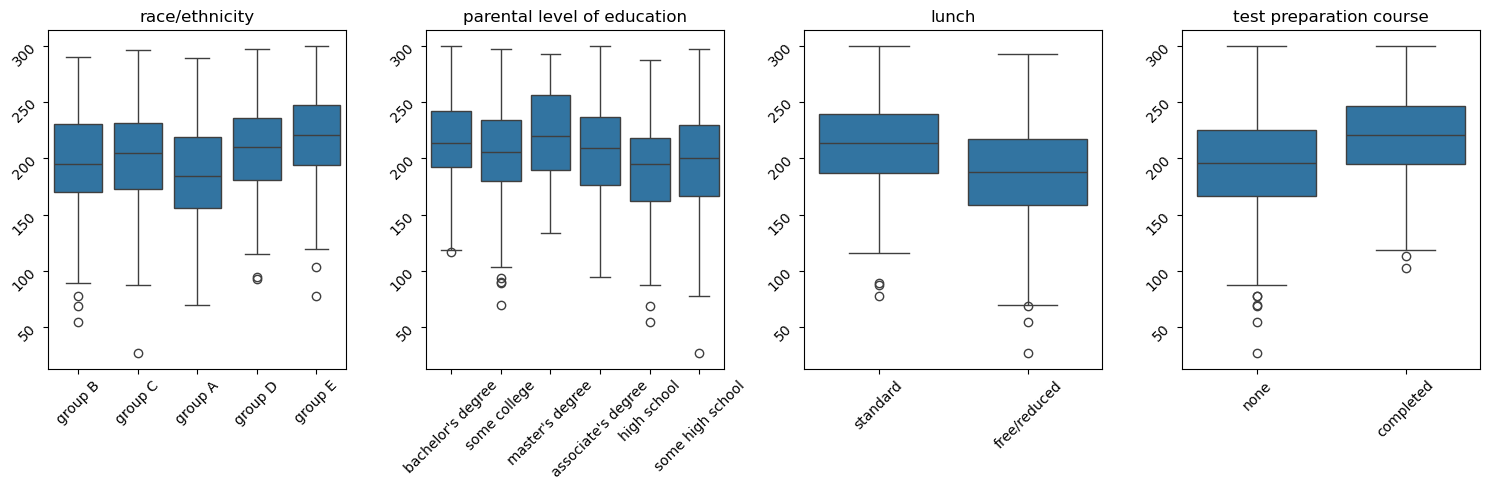

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax = ax.flatten()
for i, col in enumerate(categories):
    sns.boxplot(data=df, x=col, y='total score', ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(rotation=45)
plt.tight_layout()